<a href="https://colab.research.google.com/github/Avani-Agarwal1999/MACHINE-LEARNING-CS391L/blob/main/aa88539.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing libraries and dataset


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from keras.datasets import mnist
import scipy.linalg as LA
from sklearn.preprocessing import normalize

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

#Loading the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape)
print(X_test.shape)

#Reshaping 
X_train = X_train.reshape(len(X_train),784)
X_test = X_test.reshape(len(X_test),784)

print(X_train.shape)
print(X_test.shape)

#Taking transpose for hw1function
X_train=X_train.T
X_test=X_test.T

print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000, 784)
(10000, 784)
(784, 60000)
(784, 10000)


# hw1FindEigendigits function to return mean and eigenvectors calculated over a matrix A that has dimensions (784,k). Here k is the number of sample images used to calculate eigenvectors


In [ ]:
def hw1FindEigendigits(A):
    #Calculating the mean
    m=np.mean(A,axis=1) 
    m=m[:,np.newaxis] 
    
    #Centering the data  
    A=A-m 
    #print("In the function",A.shape)
               

    #Calculating the Co-variance matrix
    C=A.T@A
  
    #Calculating Eigenvectors(v) and Eigenvalues(evals) and sorting in descending order
    evals,v=LA.eig(C)    
    sorted_idx=np.argsort(evals)
    sorted_idx=sorted_idx[::-1] 
    v=v[:,sorted_idx]
    evals=evals[sorted_idx]
    
    #Normalising 
    v=A @ v            
    V=normalize(v.real, axis=0)
    return m,V

In [ ]:
k=1000
A=X_train[:,:k]
print(A.shape)

#Calculating the mean and the eigenvectors by calling hw1FindEigendigits function
mean,eigenvecs=hw1FindEigendigits(A)


(784, 1000)


In [ ]:
print(mean.shape)
print(eigenvecs.shape)
for i in range(1,3):
  print(mean[i][0])
  for j in range(482,487):
    print(eigenvecs[j][i])

(784, 1)
(784, 1000)
0.0
0.019507216902522106
0.013411080621424609
0.008147567895134024
0.0038199916661568463
0.016220565411705374
0.0
-0.02348688362440952
-0.03569949392026528
-0.047748175748984385
-0.045596398374370455
-0.03980802281776449


#Displaying some of the training images.

(784, 1000)
(1000, 28, 28)


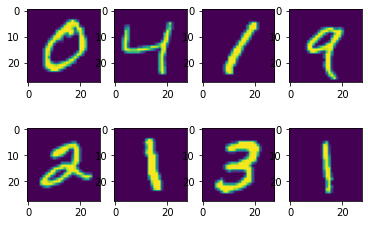

(784, 1000)


In [ ]:
print(A.shape)
num_of_images=10

pixel_data=A.T.reshape(A.shape[1],28,28)
print(pixel_data.shape)

fig=plt.figure(figsize=(6,4))


for i in range(1,9):
    fig.add_subplot(2,4,i)
    plt.imshow(pixel_data[i])
plt.show()

print(A.shape)
#for i,img in enumerate(pixel_data):
    #fig.add_subplot(2,4,1+i)
    #plt.imshow(img)
#plt.show()


#Objective 1: Display some of the eigenvectors to see what they look like -- 2 points



(784, 1000)
(1000, 28, 28)


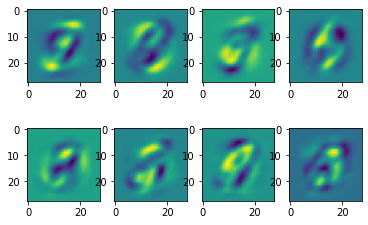

In [ ]:
#Displaying some of the Eigenvectors calculated using 2000 sample images -- 2 points
print(eigenvecs.shape)
num_of_images=10

pixel_data=eigenvecs.T.reshape(eigenvecs.shape[1],28,28)
print(pixel_data.shape)

fig=plt.figure(figsize=(6,4))


for i in range(1,9):
    fig.add_subplot(2,4,i)
    plt.imshow(pixel_data[i])
plt.show()

#Objective 2: Display some reconstructions of the test digits using the projection.  -- 2 points


(784, 20)
(784, 1)
(20, 784)
(784, 20)
(20, 28, 28)


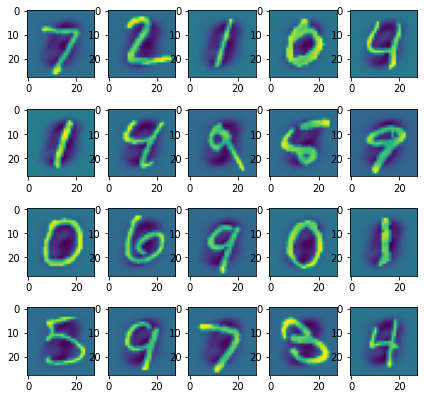

In [ ]:
#Here p is the number reconstructions of the test digits that will be displayed
p=20
new_data=X_test[:,:p] 
print(new_data.shape)
print(mean.shape)

#Taking eigenvecs = 250
new_data=new_data - mean
new_data=new_data.T

#Calculating the new data matrix
projection=new_data@eigenvecs[:,:250]

#Computing original matrix again
reconstruct=(eigenvecs[:,:250]@projection.T)
reconstruct+=mean

#print(reconstruct.shape)
print(new_data.shape)
print(reconstruct.shape)

num_of_images=20

pixel_data=new_data.reshape(20,28,28)
print(pixel_data.shape)

fig=plt.figure(figsize=(7,7))

for i in range(0,20):
    fig.add_subplot(4,5,i+1)
    plt.imshow(pixel_data[i])
plt.show()

(20, 28, 28)


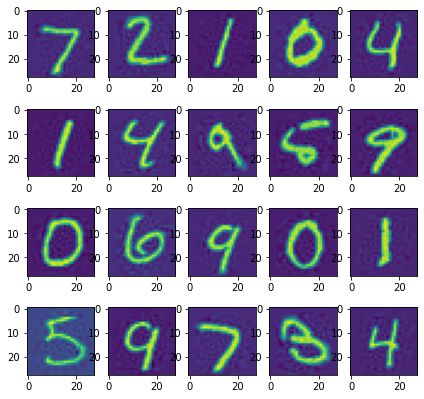

In [ ]:
#Reconstructed test digits displayed
pixel_data=reconstruct.T.reshape(20,28,28)
print(pixel_data.shape)

fig=plt.figure(figsize=(7,7))
for i in range(0,20):
    fig.add_subplot(4,5,i+1)
    plt.imshow(pixel_data[i])
plt.show()

In [ ]:
print(X_train.shape)
t=[100,500,1000,2000,5000]
for i in range(0,5):
  A=X_train[:,np.random.randint(A.shape[1], size=t[i])]
  print(A.shape)


(784, 60000)
(784, 100)
(784, 500)
(784, 1000)
(784, 2000)
(784, 5000)


(784, 60000)


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


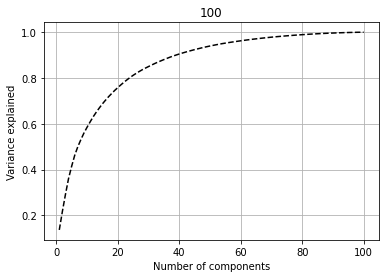

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


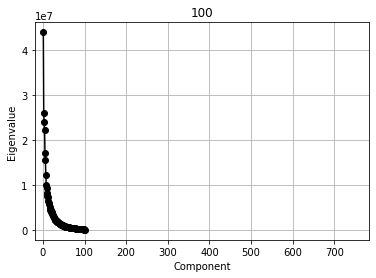

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


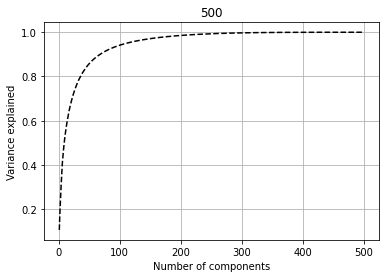

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


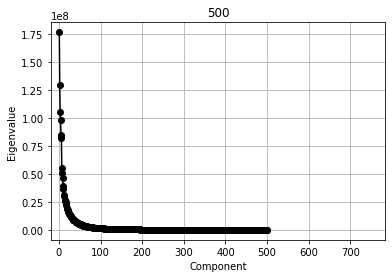

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


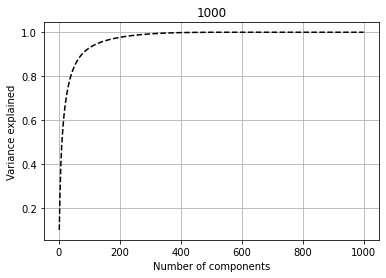

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


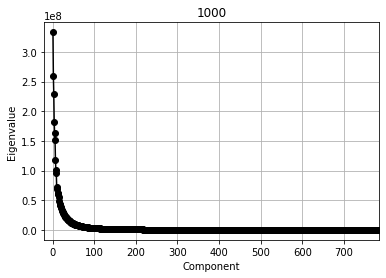

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


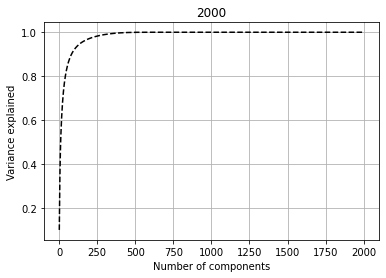

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


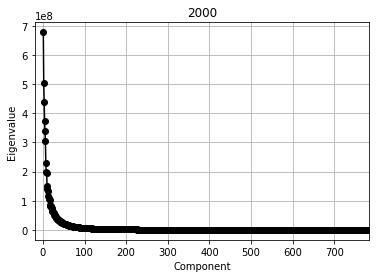

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


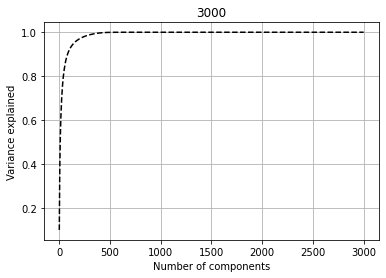

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


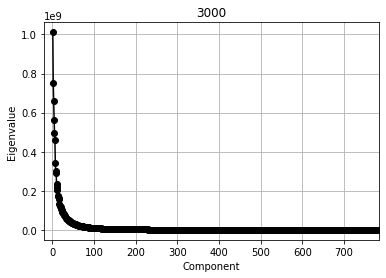

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


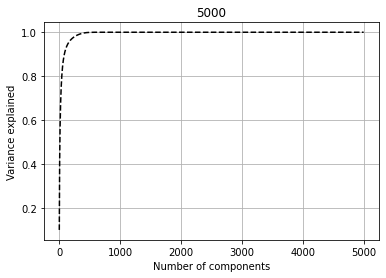

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


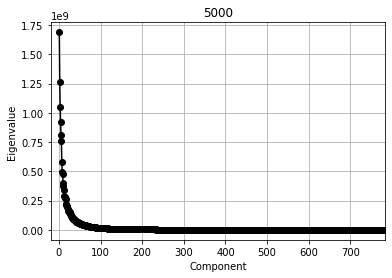

In [ ]:
#Calculating the top n eigenvectors needed for proper reconstruction of data for different amounts of k taken.
print(X_train.shape)
t=[100,500,1000,2000,3000,5000]
for i in range(0,6):

  A=X_train[:,:t[i]]
  #print(A.shape)

  num=t[i]

  m=np.mean(A,axis=1) 
  m=m[:,np.newaxis] 
    
  #Centering the data  
  A=A-m 
  #print("In the function",A.shape)
               

  #Calculating the Co-variance matrix
  C=A.T@A
  
  #Calculating Eigenvectors(v) and Eigenvalues(evals) and sorting in descending order
  evals,v=LA.eig(C)    
  sorted_idx=np.argsort(evals)
  sorted_idx=sorted_idx[::-1] 
  v=v[:,sorted_idx]
  evals=evals[sorted_idx]
    
  csum=np.cumsum(evals) 
  variance_explained= csum / np.sum(evals)
  
  plt.figure()
  plt.plot(np.arange(1, len(variance_explained) + 1), variance_explained,'--k')
  plt.xlabel('Number of components')
  plt.ylabel('Variance explained')
  
  plt.title(num)
  plt.grid()
  plt.show()

  plt.figure()
  plt.xlim(-20,784)
  plt.plot(np.arange(1, len(evals) + 1), evals, 'o-k')
  plt.xlabel('Component')
  plt.ylabel('Eigenvalue')
  plt.grid()
  plt.title(num)
  plt.show()  

acc for eig 10: 0.8752
acc for eig 20: 0.928
acc for eig 30: 0.9364
acc for eig 40: 0.934
acc for eig 50: 0.9332
acc for eig 60: 0.933
acc for eig 70: 0.9304
acc for eig 80: 0.9284
acc for eig 100: 0.9256
acc for eig 150: 0.9218
acc for eig 200: 0.92
acc for eig 250: 0.92


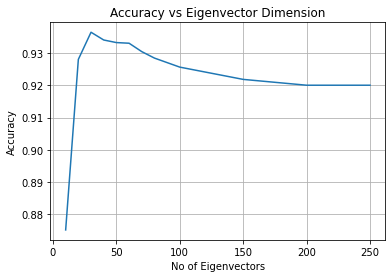

In [ ]:
n_eig_samples = np.array([10,20,30,40,50,60,70,80,100,150,200,250])
eig_acc = []
A = X_train[:,:1000]
mean,eigenvecs = hw1FindEigendigits(A)

for n in n_eig_samples:
    eigendigits = eigenvecs[:,:n]
    X_train_proj = (X_train - mean).T @ eigendigits
    X_test_proj  = (X_test  - mean).T @ eigendigits
    _, X_train_sample,_, y_train_sample = train_test_split(X_train_proj, y_train, test_size=0.1, random_state=8)
    X_test_sample = X_test_proj[:5000,:]
    y_test_sample = y_test[:5000]

    
    kNN = KNeighborsClassifier(3, weights='distance')
    kNN.fit(X_train_sample,y_train_sample)
    accuracy = kNN.score(X_test_sample, y_test_sample)
    eig_acc.append(accuracy)

    print("acc for eig %s: %s" %(n, round(accuracy, 4)))

plt.plot(n_eig_samples, eig_acc)
plt.xlabel("No of Eigenvectors")
plt.ylabel("Accuracy")
plt.title('Accuracy vs Eigenvector Dimension')
plt.grid()
plt.show()
  
    

In [ ]:
def samples_vs_accuracy_graph(mean,eigenvecs):
  acc = []
  n_train_pts = np.array([100, 200, 500, 1000, 2000, 3000, 4000, 5000])

  for size in n_train_pts:
    # Project data
    X_train_proj = (X_train - mean).T @eigenvecs[:,:30]
    X_test_proj  = (X_test  - mean).T @eigenvecs[:,:30]

    
    # Split training and testing dataset
    a, X_train_sample,b, y_train_sample = train_test_split(X_train_proj, y_train, test_size=size/60000, random_state=8)
    X_test_sample = X_test_proj[:5000,:]
    y_test_sample = y_test[:5000]

 
    kNN = KNeighborsClassifier(3, weights='distance')
    kNN.fit(X_train_sample,y_train_sample)
    accuracy = kNN.score(X_test_sample, y_test_sample)
    acc.append(accuracy)

  fig, ax = plt.subplots()
  ax.plot(n_train_pts, acc)
  ax.set_xlabel('Number of Training Samples')
  ax.set_ylabel('Accuracy')
  ax.set_title('Accuracy vs Training Size')
  plt.grid()
  plt.show()





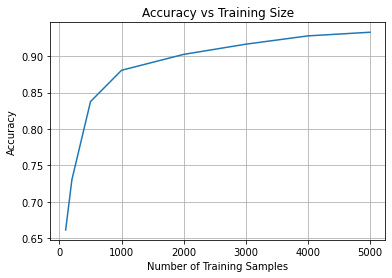

In [ ]:
acc=[]
A = X_train[:,:1000] #(784,no_of_images = size)
mean, eigenvecs = hw1FindEigendigits(A)
samples_vs_accuracy_graph(mean,eigenvecs)